# 1. Supervised Learning Churn Prediction Model

In [43]:
####  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import joblib
import os

In [ ]:
###  Load Data
df = pd.read_csv(r"your feature engineer data")

In [45]:
# Define churn 
df['Churn_Flag'] = (df['Tenure_Days'] < 30).astype(int)

df['Churn_Flag'].value_counts()

Churn_Flag
0    27923
1      281
Name: count, dtype: int64

In [46]:
features = ['Purchase_Frequency', 'Engagement_Score', 'Sales', 'Quantity', 'Profit']
X = df[features]
y = df['Churn_Flag']

In [47]:
######  To Train-test split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [48]:
#####  To Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [49]:
####  To Initialize The Supervised Models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}

In [50]:
#####  Train and Evaluate the Supervised Models
# Dictionary to store trained models
trained_models = {}

for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    preds = model.predict(X_test)

    print(f"\n @@@&&  {name} Evaluation:")
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds, digits=4))

    # Train
    model.fit(X_train_bal, y_train_bal)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    # Save trained model
    trained_models[name] = model

    # Metrics
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds, digits=4))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, probs):.4f}")

    # Cross-validation
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    print(f"Cross-validated F1 scores: {f1_scores}")
    print(f"Mean F1 score: {f1_scores.mean():.4f}")


 @@@&&  LogisticRegression Evaluation:
[[5375  210]
 [   0   56]]
              precision    recall  f1-score   support

           0     1.0000    0.9624    0.9808      5585
           1     0.2105    1.0000    0.3478        56

    accuracy                         0.9628      5641
   macro avg     0.6053    0.9812    0.6643      5641
weighted avg     0.9922    0.9628    0.9746      5641

[[5375  210]
 [   0   56]]
              precision    recall  f1-score   support

           0     1.0000    0.9624    0.9808      5585
           1     0.2105    1.0000    0.3478        56

    accuracy                         0.9628      5641
   macro avg     0.6053    0.9812    0.6643      5641
weighted avg     0.9922    0.9628    0.9746      5641

ROC-AUC Score: 0.9940
Cross-validated F1 scores: [1.         0.85714286 0.56410256 0.70454545 0.72727273]
Mean F1 score: 0.7706

 @@@&&  DecisionTree Evaluation:
[[5579    6]
 [   2   54]]
              precision    recall  f1-score   support

        

c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:59:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:59:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[5582    3]
 [   2   54]]
              precision    recall  f1-score   support

           0     0.9996    0.9995    0.9996      5585
           1     0.9474    0.9643    0.9558        56

    accuracy                         0.9991      5641
   macro avg     0.9735    0.9819    0.9777      5641
weighted avg     0.9991    0.9991    0.9991      5641

ROC-AUC Score: 0.9999


c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:59:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:59:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:59:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:59:20] WARNING: C:\actio

Cross-validated F1 scores: [0.94915254 0.82352941 0.48888889 0.70212766 0.74509804]
Mean F1 score: 0.7418
[LightGBM] [Info] Number of positive: 22338, number of negative: 22338
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 44676, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

 @@@&&  LightGBM Evaluation:
[[5583    2]
 [   2   54]]
              precision    recall  f1-score   support

           0     0.9996    0.9996    0.9996      5585
           1     0.9643    0.9643    0.9643        56

    accuracy                         0.9993      5641
   macro avg     0.9820    0.9820    0.9820      5641
weighted avg     0.9993    0.9993    0.9993      5641

[LightGB

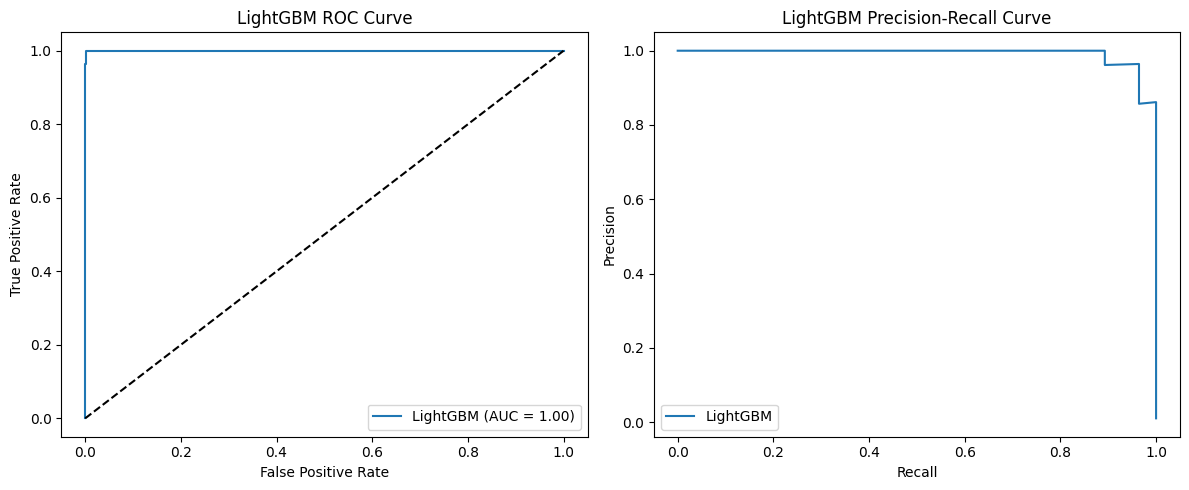

In [51]:
# Visualization  ----- To Visualize the ROC Curve and Precision-Recall Curve
fpr, tpr, _ = roc_curve(y_test, probs)
precision, recall, _ = precision_recall_curve(y_test, probs)

plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, probs):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title(f'{name} ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=name)
plt.title(f'{name} Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Save the all models Models.pkl filepath
file_dir = r"your models path"
os.makedirs(file_dir, exist_ok=True)

joblib.dump(trained_models, os.path.join(file_dir, "Models.pkl"))
print("@@@&&& All Models are Saved in Models.pkl")

@@@&&& All Models are Saved in Models.pkl


In [ ]:
model_path = r"your Models\Models.pkl"
models = joblib.load(model_path)

print("✅ Models loaded successfully. Available models:")
for model_name in models.keys():
    print(f"🔹 {model_name}")

✅ Models loaded successfully. Available models:
🔹 LogisticRegression
🔹 DecisionTree
🔹 RandomForest
🔹 XGBoost
🔹 LightGBM


In [54]:
lr_model = models["LogisticRegression"]
lr_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [55]:
de_model = models["DecisionTree"]
de_model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [56]:
rf_model = models["RandomForest"]
rf_model

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
xg_model = models["XGBoost"]
xg_model

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [58]:
lgbm_model = models["LightGBM"]
lgbm_model

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


# 2. Deep Learning Models of  ---- Churn Prediction

In [59]:
####  Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from IPython.display import Image
import matplotlib.pyplot as plt
import json

1.   Artificial Neural Networks (ANNs)

In [ ]:
####  Load Feature Engineering Data
df = pd.read_csv(r"featureengineering preprocessed data.csv")

In [61]:
### To Drop the Unwanted Columns
drop_cols = [ 'RowID', 'Order ID', 'Order Date', 'Ship Date', 'Customer_ID', 'Product_ID', 'Customer Name', 'First_Name', 'Product Name']
df.drop(columns=drop_cols, inplace=True)

In [62]:
####  To Create Label Encode Catagorical Columns
catagorical_cols = [ 'Ship Mode', 'Payment Mode', 'Gender', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']

le = LabelEncoder()
for col in catagorical_cols:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [63]:
### To Ensure the Target Column
if 'churn' not in df.columns:
    df['churn'] = (df['Tenure_Days'] < 30).astype(int)

In [64]:
#### To Separate the Features and Target
x = df.drop('churn', axis=1)
y = df['churn']

In [65]:
#####  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
#####  Feature Scaling for  X_Train, and X_Test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
#####  To Build The Artificial Neural Networks(ANNs)  ---
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
###  Summary of this Model and Optimizer, Loss, Metrics
model.summary()
model.loss
model.optimizer
model.metrics

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

[<Mean name=loss>, <CompileMetrics name=compile_metrics>]

In [69]:
######  To Train the Model with Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/100
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9489 - loss: 0.2309 - val_accuracy: 0.9911 - val_loss: 0.0337
Epoch 2/100
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9913 - loss: 0.0296 - val_accuracy: 0.9927 - val_loss: 0.0218
Epoch 3/100
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9914 - loss: 0.0267 - val_accuracy: 0.9947 - val_loss: 0.0165
Epoch 4/100
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9941 - loss: 0.0198 - val_accuracy: 0.9969 - val_loss: 0.0134
Epoch 5/100
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9951 - loss: 0.0179 - val_accuracy: 0.9973 - val_loss: 0.0123
Epoch 6/100
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9947 - loss: 0.0174 - val_accuracy: 0.9973 - val_loss: 0.0122
Epoch 7/100
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9954 - loss: 0.0161 - val_accuracy: 0.9978 - val_loss: 0.0113
Epoch 8/100
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9957 - loss: 0.0160 - val_accu

In [70]:
#####  To Evaluate the Model of this Trained_Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\n  Classification Report:\n", classification_report(y_test, y_pred))
print("\n  Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n  ROC AUC Score:", roc_auc_score(y_test, y_pred))

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step

  Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5579
           1       1.00      0.66      0.80        62

    accuracy                           1.00      5641
   macro avg       1.00      0.83      0.90      5641
weighted avg       1.00      1.00      1.00      5641


  Confusion Matrix:
 [[5579    0]
 [  21   41]]

  ROC AUC Score: 0.8306451612903225


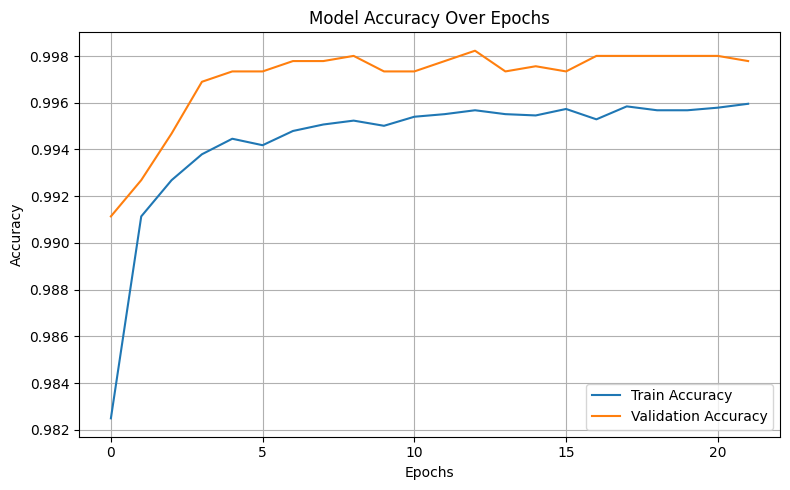

In [71]:
#####  To Visualize the Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
######  To Save the Trained Artificial Neural Networks(ANNs)
save_path = r'Models\ann_churn_model.keras'
model.save(save_path)
print(f"\n@@@@****  Model saved successfully at: {save_path}")


@@@@****  Model saved successfully at: C:\Users\anand\Desktop\Customer Churn Prediction and Sales Dashboard Project\Models\ann_churn_model.keras


In [73]:
#### Summary of the Trained ANN Model Architecture
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,493 (29.27 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,996 (19.52 KB)

2. Recurrent Neural Networks (RNNs) for Time-based Churn Trends 

In [74]:
#####  Import Libraries
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
### Load Feature Engineering Data
File_path = r"feature_engineering data.csv"
df = pd.read_csv(File_path)

In [76]:
#####  To Prepare Sequential Features
### To Rename the columns
df.rename(columns={'Customer_ID': 'customer_id', 'Engagement_Score': 'engagement_score', 'Tenure_Days': 'tenure', 'Purchase_Frequency': 'purchase_frequency'
}, inplace=True)

In [77]:
##### To Stimulate the "month" and "churn"
if 'month' not in df.columns:
    df['month'] = pd.to_datetime(df['Order Date']).dt.month

if 'churn' not in df.columns:
    df['churn'] = (df['engagement_score'] < 0.4).astype(int)

In [78]:
##### To Sort and group the df
df_sorted = df.sort_values(['customer_id', 'month'])
sequence_features = ['engagement_score', 'tenure']
target_col = 'churn'

X_seq, y_seq = [], []

grouped = df_sorted.groupby('customer_id')
for _, group in grouped:
    if len(group) >= 12:
        features = group[sequence_features].values[:12]
        label = group[target_col].values[0]
        X_seq.append(features)
        y_seq.append(label)

X = np.array(X_seq)
y = np.array(y_seq)

print(" Sequences prepared. Shape:", X.shape)

 Sequences prepared. Shape: (568, 12, 2)


In [79]:
#### To Normalize the Features
scaler = MinMaxScaler()
X_scaled = np.array([scaler.fit_transform(x) for x in X])
print(" Features normalized.")

 Features normalized.


In [80]:
##### To Build the RNN Model
model = Sequential([
    Input(shape=(X_scaled.shape[1], X_scaled.shape[2])),
    SimpleRNN(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,401 (25.00 KB)

 Trainable params: 6,401 (25.00 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
#### To Train the Model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7917 - loss: 0.6920 - val_accuracy: 0.7982 - val_loss: 0.6887
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7913 - loss: 0.6877 - val_accuracy: 0.7982 - val_loss: 0.6844
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8040 - loss: 0.6832 - val_accuracy: 0.7982 - val_loss: 0.6802
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8195 - loss: 0.6783 - val_accuracy: 0.7982 - val_loss: 0.6761
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7959 - loss: 0.6752 - val_accuracy: 0.7982 - val_loss: 0.6721
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8111 - loss: 0.6701 - val_accuracy: 0.7982 - val_loss: 0.6680
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7926 - loss: 0.6675 - val_accuracy: 0.7982 - val_loss: 0.6641
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7784 - loss: 0.6651 - val_accuracy: 0.7982 - val_loss

In [ ]:
#### To Save the RNN Model in "Models" save_path
save_path = r"Models"
os.makedirs(save_path, exist_ok=True)

model.save(os.path.join(save_path, "rnn_churn_model.h5"))
print("@@@  RNN model saved successfully.")

@@@  RNN model saved successfully.


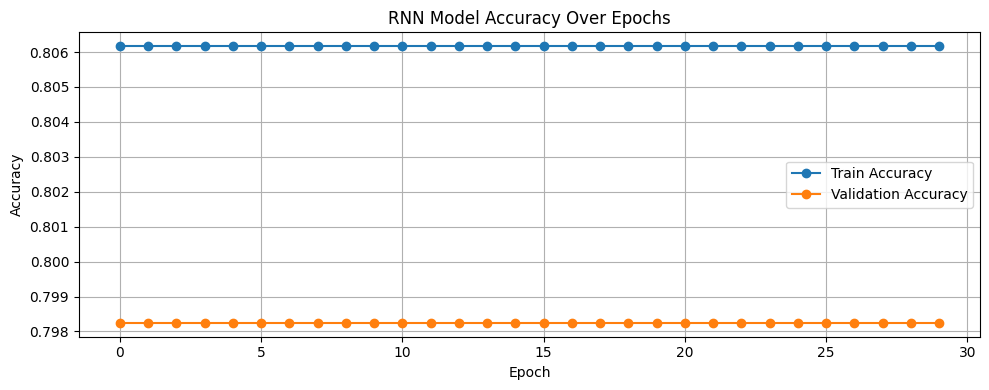

In [83]:
##### To Plot the RNN Trained Model --- Accuracy
###  RNN Accuracy Plot
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('RNN Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

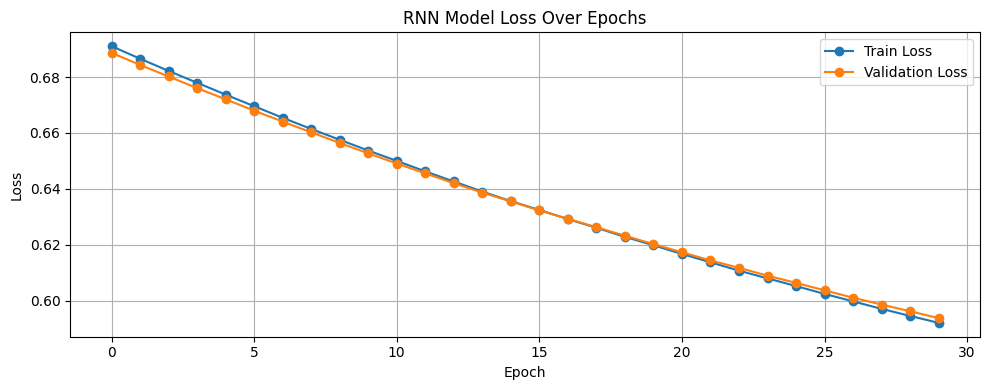

In [84]:
##### To Plot the RNN Trained Model --- Loss
###  RNN Loss Plot
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('RNN Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Unsupervised Learning ----  for Customer Segmentation

In [93]:
### Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [ ]:
#### Load Data
data_path = r"featureengineering data.csv"
df = pd.read_csv(data_path)

In [91]:
#####  To Select the Numerical Features for Clustering
features = ['Sales', 'Quantity', 'Profit', 'Purchase_Frequency', 'Engagement_Score', 'Tenure_Days']
X = df[features].copy()
x.head()

,Ship Mode,Sales,Quantity,Profit,Payment Mode,Gender,Segment,Country,City,State,Region,Category,Sub-Category,Purchase_Frequency,Engagement_Score,Tenure_Days_x,Tenure_Days_y,Tenure_Days
0,3,0.008034,0.000000,0.441884,2,1,1,0,136,18,1,0,4,5,0.552966,631,631,631
1,3,0.008034,0.000000,0.441884,2,1,1,0,263,3,3,0,4,5,0.552966,631,631,631
2,3,0.008034,0.000000,0.441884,2,1,1,0,62,11,0,0,4,5,0.552966,631,631,631
3,3,0.008034,0.000000,0.441884,2,1,1,0,227,3,3,0,4,5,0.552966,631,631,631
4,3,0.019024,0.153846,0.442551,2,1,1,0,136,18,1,0,4,5,0.552966,631,631,631


In [92]:
### To Sandardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
#### To Apply 3D - Principle Compount Analysis - PCA
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca_3d[:, 0]
df['PCA2'] = X_pca_3d[:, 1]
df['PCA3'] = X_pca_3d[:, 2]

In [ ]:
####  To Run the K-Means Clustering and to Save the Model
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

## Save the Clustering
Save_path = r"Models"
joblib.dump(kmeans, os.path.join(Save_path, 'kmeans_model.pkl'))

['C:\\Users\\anand\\Desktop\\Customer Churn Prediction and Sales Dashboard Project\\Models\\kmeans_model.pkl']

In [99]:
####  To Run the DBSCAN Anomaly Detection and Save the Model
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Label'] = dbscan.fit_predict(X_scaled)
df['Anomaly'] = df['DBSCAN_Label'].apply(lambda x: 1 if x == -1 else 0)

### Save the DBSCAN
joblib.dump(dbscan, os.path.join(Save_path, 'dbscan_model.pkl'))

['C:\\Users\\anand\\Desktop\\Customer Churn Prediction and Sales Dashboard Project\\Models\\dbscan_model.pkl']

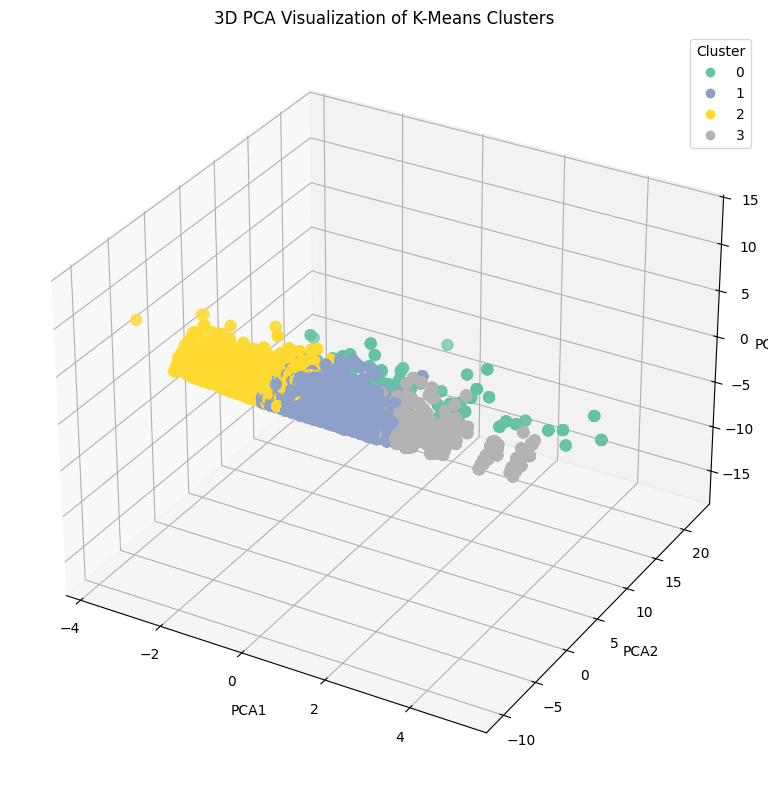

In [100]:
####  To 3D- Plot Visualizing the --- K-Means Clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'],
                     c=df['KMeans_Cluster'], cmap='Set2', s=60)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PCA Visualization of K-Means Clusters')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

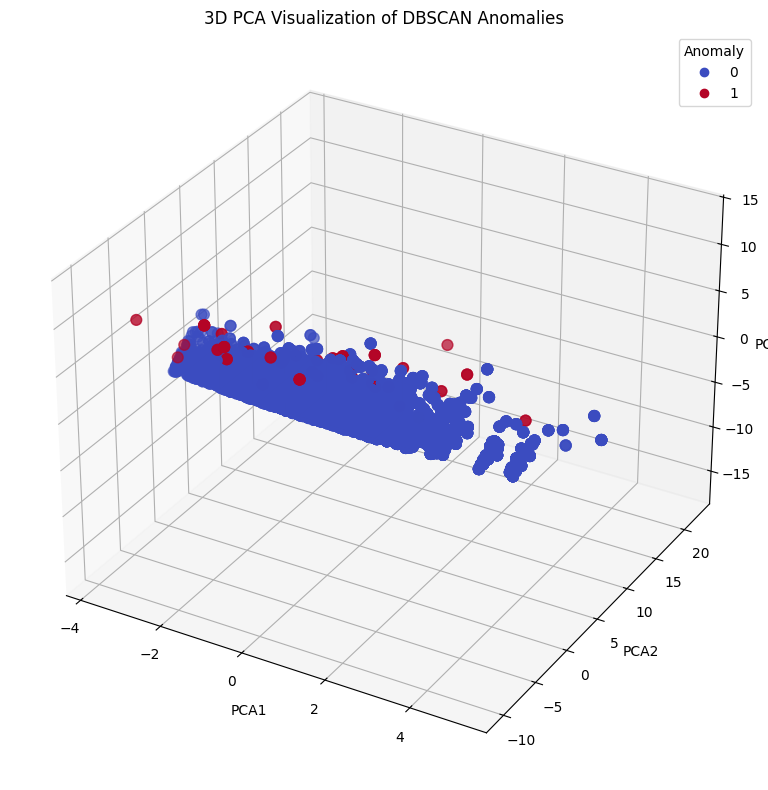

In [101]:
####  To 3D- Plot Visualizing the --- DBSCAN Anomalys
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'],
                     c=df['Anomaly'], cmap='coolwarm', s=60)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PCA Visualization of DBSCAN Anomalies')
plt.legend(*scatter.legend_elements(), title="Anomaly")
plt.tight_layout()
plt.show()

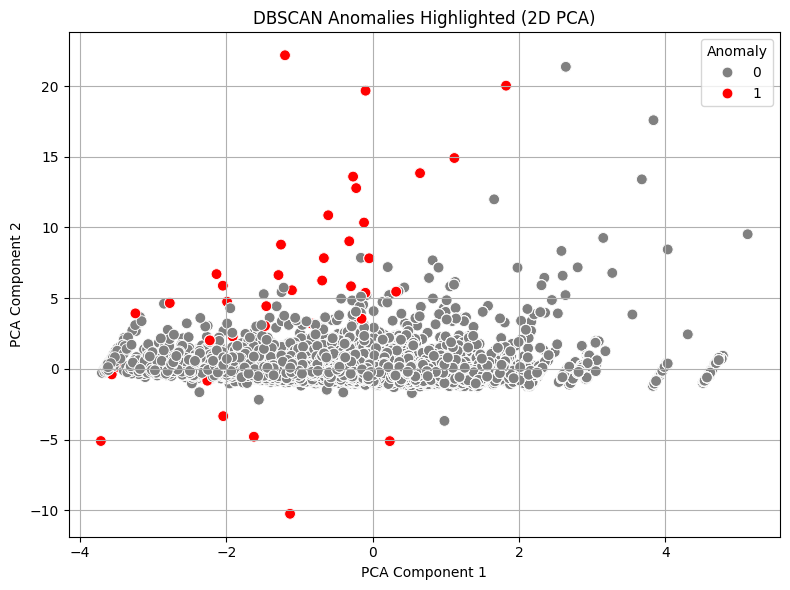

In [102]:
#### To Visualize the 2D-- Plot of Highlight DBSCAN Anomalys
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Anomaly',
                palette={0: 'gray', 1: 'red'}, s=60)
plt.title('DBSCAN Anomalies Highlighted (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Anomaly')
plt.grid(True)
plt.tight_layout()
plt.show()